# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Discrete and Fast Fourier Transforms (DFT and FFT)

In the following we will implement a DFT algorithm and, based on that, a FFT algorithm. Our aim is to experience the drastic improvement of computational time in the FFT case.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import timeit

### Task 1

Implement a Python function $\text{DFT(yk)}$ which returns the Fourier transform defined by

\begin{equation}
\beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij x_k}
\end{equation}

with $x_k = \frac{2\pi k}{N}$ and $j = 0, 1, ..., N-1$. The $\text{yk}$ should represent the array corresponding to $y_k = f(x_k)$. Please note that this definition is slightly different to the one we introduced in the lecture. Here we follow the notation of Numpy and Scipy.

Hint: try to write the sum as a matrix-vector product and use $\text{numpy.dot()}$ to evaluate it.

In [2]:
# TODO: Write docstrings, ugh.
def DFT(yk):
    N = len(yk)
    xk = 2*np.pi*np.arange(N)/N
    beta = np.dot(yk, np.exp(np.outer(-np.arange(N), xk*1j)))
    return beta

### Task 2 

Make sure your function $\text{DFT(yk)}$ and Numpy’s FFT function $\text{numpy.fft.fft(yk)}$ return
the same data by plotting $|\beta_j|$ vs. $j$ for

\begin{equation}
    y_k = f(x_k) = e^{20i x_k} + e^{40 i x_k}
\end{equation}
and
\begin{equation}
    y_k = f(x_k) = e^{i 5 x_k^2}
\end{equation}

using $N = 128$ for both routines.

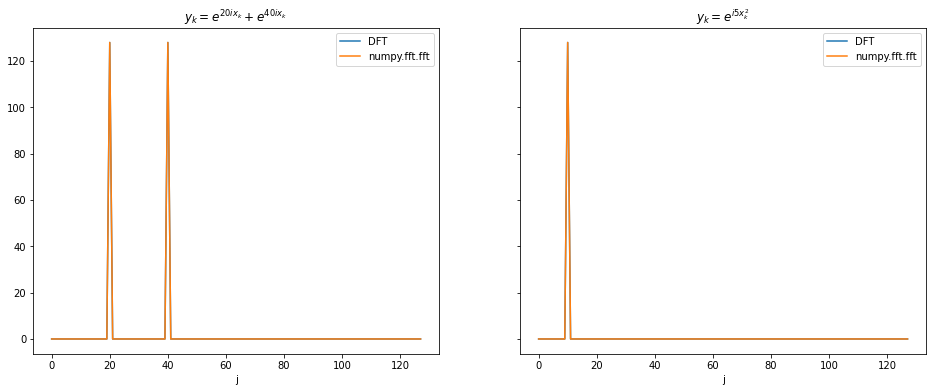

In [3]:
N   = 128

xk  = 2*np.pi*np.arange(N)/N
yk0 = np.exp(20j*xk) + np.exp(40j*xk)
yk1 = np.exp(5j*xk*2)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16,6))

ax[0].set_xlabel("j")
ax[1].set_xlabel("j")

ax[0].set_title("$y_k = e^{20ix_k} + e^{40ix_k}$")
ax[0].plot(np.abs(DFT(yk0)), label="DFT")
ax[0].plot(np.abs(np.fft.fft(yk0)), label="numpy.fft.fft")
ax[0].legend(loc="upper right")

ax[1].set_title("$y_k = e^{i5x^2_k}$")
ax[1].plot(np.abs(DFT(yk1)), label="DFT")
ax[1].plot(np.abs(np.fft.fft(yk1)), label="numpy.fft.fft")
ax[1].legend(loc="upper right")

# TODO: So the graphs overlap completely. Is this good enough?
#       To make it more clear, we could mirror one of the graphs (multiply by -1),
#       like what is often done in spectroscopy, or we could add the difference.

fig.show()

### Task 3

Analyze the evaluation-time scaling of your $\text{DFT(yk)}$ function with the help of the timeit
module. Base your code on the following example:

```python
import timeit

tOut = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
tMean = np.mean(tOut)
```
This example evaluates $\text{DFT(yk)}$ 5 × 10 times and stores the resulting 5 evaluation times in tOut. Afterwards we calculate the mean value of these 5 repetitions. 
Use this example to calculate and plot the evaluation time of your $\text{DFT(yk)}$ function for $N = 2^2, 2^3, ..., 2^M$. Depending on your implementation you might be able to go up to $M = 10$. Be careful and increase M just step by step!

In [4]:
for M in range(2, 10+1):
    N = 2**M
    xk  = 2*np.pi*np.arange(N)/N
    # Using the first equation for yk from the previous exercise.
    yk = np.exp(20j*xk) + np.exp(40j*xk)
    tOut = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
    tMean = np.mean(tOut)
    print("M =", M, "gives")
    print("tOut =", tOut)
    print()

M = 2 gives
tOut = [0.0003551868721842766, 0.00026587769389152527, 0.0002683410421013832, 0.0002652248367667198, 0.00029958970844745636]

M = 3 gives
tOut = [0.00037261005491018295, 0.0003149900585412979, 0.0002723895013332367, 0.00024654995650053024, 0.000258052721619606]

M = 4 gives
tOut = [0.00034819450229406357, 0.00033616088330745697, 0.0003195982426404953, 0.00034148991107940674, 0.00035313330590724945]

M = 5 gives
tOut = [0.0007255515083670616, 0.0005129771307110786, 0.0004988498985767365, 0.0004972768947482109, 0.0005336767062544823]

M = 6 gives
tOut = [0.0025200899690389633, 0.0023925071582198143, 0.0023851143196225166, 0.0023938296362757683, 0.0023842724040150642]

M = 7 gives
tOut = [0.008896775543689728, 0.00880778580904007, 0.008781216107308865, 0.008825629949569702, 0.008792318403720856]

M = 8 gives
tOut = [0.03435589000582695, 0.033995422534644604, 0.034102585166692734, 0.03416615817695856, 0.03535666409879923]

M = 9 gives
tOut = [0.1477726474404335, 0.1478627100586

### Task 4

A very simple FFT algorithm can be derived by the following separation of the sum from
above:

\begin{align}
     \beta_j = \sum^{N-1}_{k=0} f(x_k) e^{-ij \frac{2\pi k}{N}} 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi 2k}{N}} 
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi (2k+1)}{N}}\\ 
         &= \sum^{N/2 - 1}_{k=0} f(x_{2k}) e^{-ij \frac{2\pi k}{N/2}}
          + \sum^{N/2 - 1}_{k=0} f(x_{2k+1}) e^{-ij \frac{2\pi k}{N/2}} e^{-ij \frac{2\pi}{N}}\\
         &= \beta^{\text{even}}_j + \beta^{\text{odd}}_j e^{-ij \frac{2\pi}{N}}
\end{align}

where $\beta^{\text{even}}_j$ is the Fourier transform based on only even $k$ (or $x_k$) and $\beta^{\text{odd}}_j$ the Fourier transform based on only odd $k$. In case $N = 2^M$ this even/odd separation can be done again and again in a recursive way. 

Use the template below to implement a $\text{FFT(yk)}$ function, making use of your $\text{DFT(yk)}$ function from above. Make sure that you get the same results as before by comparing the results from $\text{DFT(yk)}$
and $\text{FFT(yk)}$ for both functions defined in task 2.

```python
def FFT(yk):
    """Don't forget to write a docstring ...
    """
    N = # ... get the length of yk
    
    assert # ... check if N is a power of 2. Hint: use the % (modulo) operator
    
    if(N <= 2):
        return # ... call DFT with all yk points
    
    else:
        betaEven = # ... call FFT but using just even yk points
        betaOdd = # ... call FFT but using just odd yk points
        
        expTerms = np.exp(-1j * 2.0 * np.pi * np.arange(N) / N)
        
        # Remember : beta_j is periodic in j !
        betaEvenFull = np.concatenate([betaEven, betaEven])
        betaOddFull = np.concatenate([betaOdd, betaOdd])
        
        return betaEvenFull + expTerms * betaOddFull
```

In [5]:
def FFT(yk):
    # TODO: Write a docstring.
    """Don't forget to write a docstring ...
    """
    N = len(yk)

    # N should be a power of two
    assert np.log2(N).is_integer()

    if(N <= 2):
        return DFT(yk)

    else:
        betaEven = FFT(yk[::2])
        betaOdd = FFT(yk[1::2])

        expTerms = np.exp(-1j * 2.0 * np.pi * np.arange(N) / N)

        # Remember : beta_j is periodic in j !
        betaEvenFull = np.concatenate([betaEven, betaEven])
        betaOddFull = np.concatenate([betaOdd, betaOdd])

        return betaEvenFull + expTerms * betaOddFull

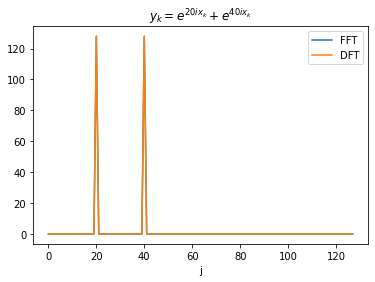

In [6]:
# N needs to be a power of two for FFT to work.
N   = 2**7

xk  = 2*np.pi*np.arange(N)/N
yk = np.exp(20j*xk) + np.exp(40j*xk)

fig, ax = plt.subplots()

ax.set_xlabel("j")

ax.set_title("$y_k = e^{20ix_k} + e^{40ix_k}$")
ax.plot(np.abs(FFT(yk)), label="FFT")
ax.plot(np.abs(DFT(yk)), label="DFT")
ax.legend(loc="upper right")

fig.show()

### Task 5

Analyze the evaluation-time scaling of your $\text{FFT(yk)}$ function with the help of the timeit module and compare it to the scaling of the $\text{DFT(yk)}$ function.

In [7]:
for M in range(2, 10+1):
    N = 2**M
    xk  = 2*np.pi*np.arange(N)/N
    # Using the first equation for yk from the second exercise.
    yk = np.exp(20j*xk) + np.exp(40j*xk)
    tOutDFT = timeit.repeat(stmt=lambda: DFT(yk), number=10, repeat=5)
    tOutFFT = timeit.repeat(stmt=lambda: FFT(yk), number=10, repeat=5)
    tMean = np.mean(tOut)
    print("M =", M, "gives")
    print("tOutDFT =", tOutDFT)
    print("tOutFFT =", tOutFFT)
    print()

M = 2 gives
tOutDFT = [0.00026126671582460403, 0.00021027959883213043, 0.0001835385337471962, 0.00023766234517097473, 0.00022200308740139008]
tOutFFT = [0.0006446670740842819, 0.0007413318380713463, 0.0006805472075939178, 0.0006410712376236916, 0.0006419029086828232]

M = 3 gives
tOutDFT = [0.00022369623184204102, 0.00022925715893507004, 0.0002404283732175827, 0.00021736416965723038, 0.0002731001004576683]
tOutFFT = [0.0013865511864423752, 0.0013830652460455894, 0.0013337815180420876, 0.0012838244438171387, 0.0012847669422626495]

M = 4 gives
tOutDFT = [0.0003327140584588051, 0.0003035273402929306, 0.0003030272200703621, 0.00030216481536626816, 0.00030276738107204437]
tOutFFT = [0.002759365364909172, 0.002286495640873909, 0.0020805923268198967, 0.0020598340779542923, 0.0020735692232847214]

M = 5 gives
tOutDFT = [0.0008888524025678635, 0.000489652156829834, 0.00048649683594703674, 0.00048589520156383514, 0.0004848325625061989]
tOutFFT = [0.004292245022952557, 0.00426078587770462, 0.004

For small $M$, `DFT` is faster, but as $M$ increases, `FFT` gets a lot more efficient.